<a href="https://colab.research.google.com/github/jopelle/Practica3_Ingenieria_Software/blob/master/Entregable1_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Entregable 1 Visualización de los datos**

**Importar librerías**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles. 
%config InlineBackend.figure_format = 'svg'

**Cargar dataset de entrenamiento**

In [2]:
!unzip ia1920.zip
traindf = pd.read_csv("train.csv")

Archive:  ia1920.zip
  inflating: test.csv                
  inflating: train.csv               


**Visualización de los datos**

Desccriptores cuantitativos (En este dataset son todos)

HISTOGRAMAS

In [0]:
traindf.columns

Index(['SL', 'EEG', 'BP', 'HR', 'CIRCULATION', 'ACTIVITY'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9e615d828>,
      dtype=object)

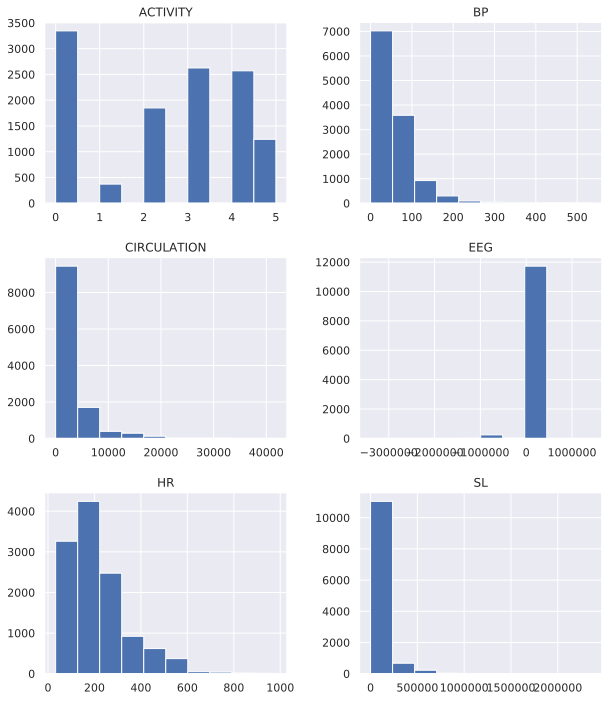

In [0]:
traindf[traindf.columns].hist(figsize=(10, 12))

GRAFICOS DE DENSIDAD

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

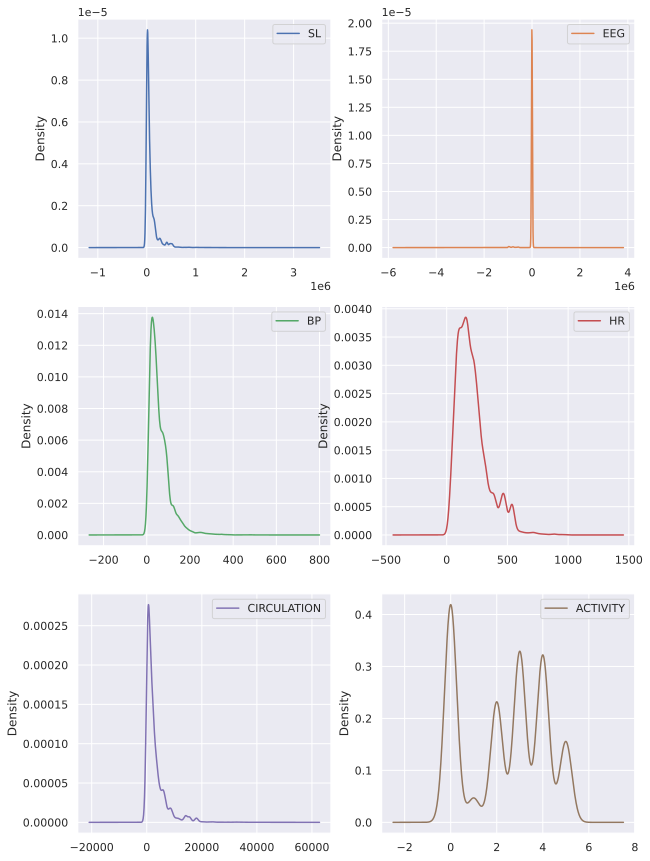

In [32]:
traindf[traindf.columns].plot(kind='density', subplots=True, layout=(3, 2), 
                  sharex=False, figsize=(10, 15));

In [9]:
traindf['ACTIVITY'].value_counts()

0    3344
3    2625
4    2569
2    1849
5    1241
1     371
Name: ACTIVITY, dtype: int64

Podemos ver que los datos están repartidos, así que todas las acitividades estám representadas en el dataset, aunque de forma algo desigual.

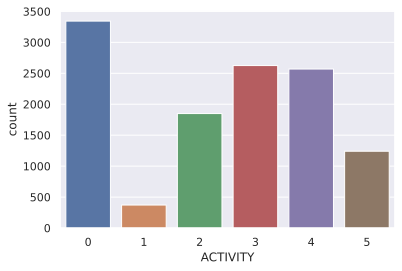

In [26]:
sns.countplot(x='ACTIVITY', data=traindf);

**VISUALIZACIÓN MULTIVARIANTE**

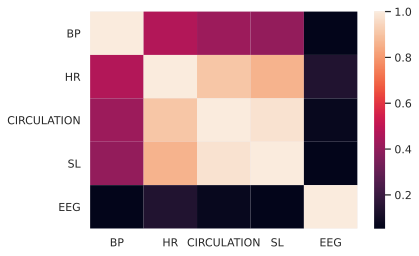

In [27]:
numerical = list(set(traindf.columns) - 
                 set(['ACTIVITY']))

corr_matrix = traindf[numerical].corr()
sns.heatmap(corr_matrix);

Podemos ver que existe una alta correlacion entre CIRCULATION y SL, también pero no tan alta entre HR y CIRCULATION y SL

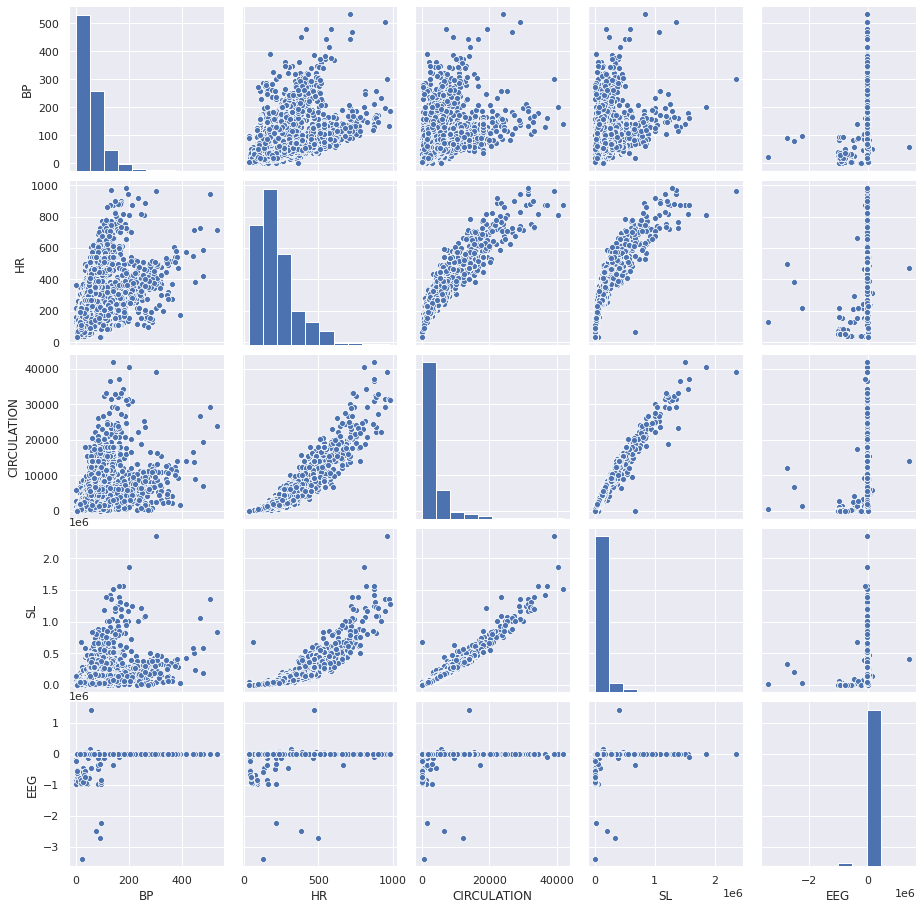

In [34]:
numerical = list(set(numerical) - set(['ACTIVITY']))
%config InlineBackend.figure_format = 'png'
sns.pairplot(traindf[numerical]);


Se confirma lo dicho

In [0]:
%config InlineBackend.figure_format = 'svg'

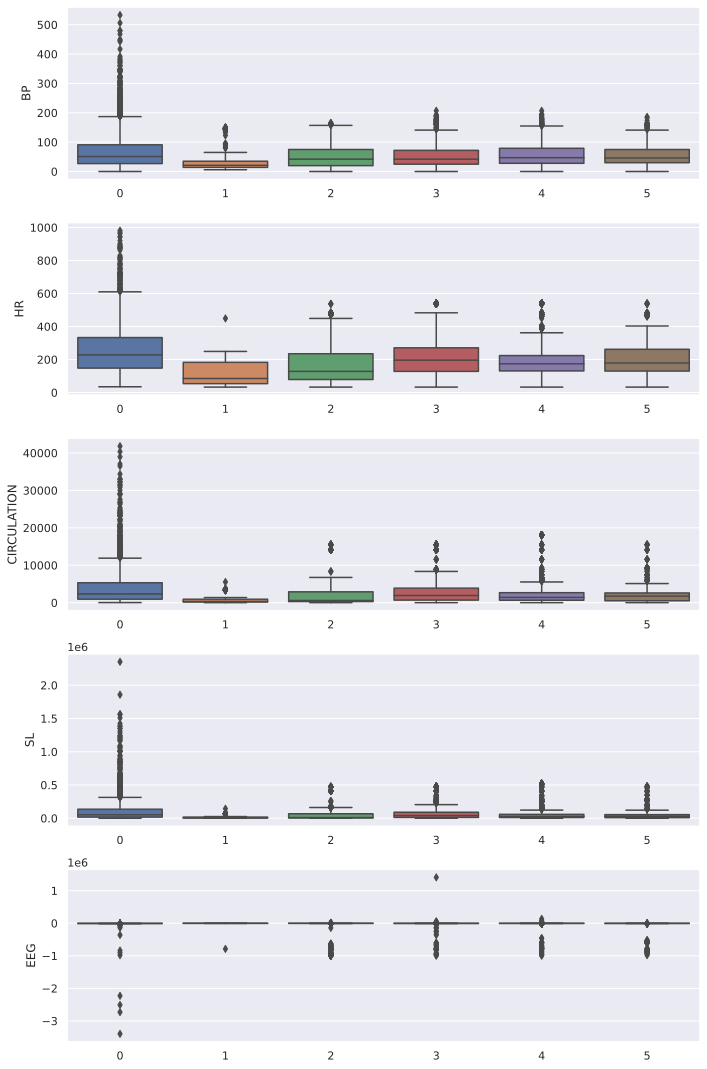

In [40]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))
for idx, feat in enumerate(numerical):
    ax = axes[idx]
    sns.boxplot(x='ACTIVITY', y=feat, data=traindf, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

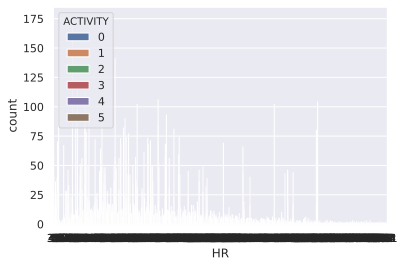

In [42]:
sns.countplot(x='HR', hue='ACTIVITY', data=traindf);